In [19]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split


In [20]:
df = pd.read_csv('heart_disease_data.csv')
df.drop('PatientID',axis=1,inplace=True)
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,67,Male,Asymptomatic,131,287,1,LVH,69,No,0.0,Up,1
1,57,Male,Atypical,147,156,1,ST,187,Yes,2.3,Up,1
2,43,Male,Non-anginal,101,119,1,ST,158,No,3.4,Up,1
3,71,Female,Typical,92,372,1,LVH,171,Yes,2.9,Up,1
4,36,Female,Non-anginal,107,218,0,LVH,119,No,5.2,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,58,Female,Non-anginal,110,261,1,LVH,129,Yes,3.7,Up,1
796,45,Female,Atypical,163,199,0,ST,103,Yes,1.8,Down,1
797,76,Female,Asymptomatic,127,240,0,ST,145,Yes,5.4,Up,0
798,75,Female,Atypical,135,182,1,Normal,78,Yes,3.8,Flat,1


In [21]:
label  = LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i] = label.fit_transform(df[i])
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,67,1,0,131,287,1,0,69,0,0.0,2,1
1,57,1,1,147,156,1,2,187,1,2.3,2,1
2,43,1,2,101,119,1,2,158,0,3.4,2,1
3,71,0,3,92,372,1,0,171,1,2.9,2,1
4,36,0,2,107,218,0,0,119,0,5.2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,58,0,2,110,261,1,0,129,1,3.7,2,1
796,45,0,1,163,199,0,2,103,1,1.8,0,1
797,76,0,0,127,240,0,2,145,1,5.4,2,0
798,75,0,1,135,182,1,1,78,1,3.8,1,1


In [22]:
X = df[['ChestPainType','Cholesterol']].values
y = df['HeartDisease'].values

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.3563185 ,  0.48677637],
       [-0.46179682, -1.07961284],
       [ 0.43272486, -1.52202811],
       ...,
       [-1.3563185 , -0.0752106 ],
       [-0.46179682, -0.76872643],
       [ 0.43272486,  0.35524751]], shape=(800, 2))

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=31)


kernel :LINEAR|| Accuracy:0.62


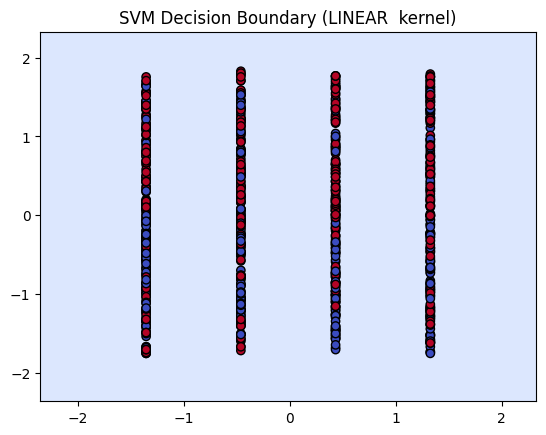

kernel :POLY|| Accuracy:0.63


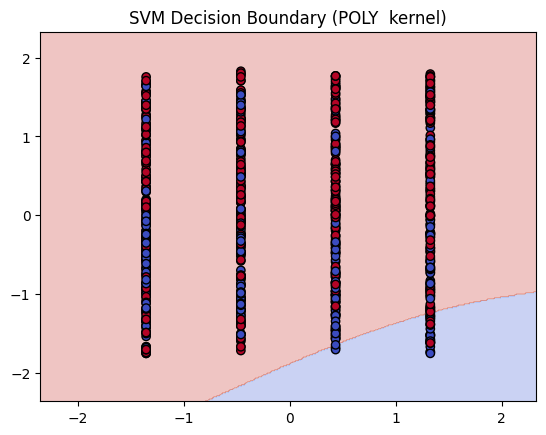

kernel :RBF|| Accuracy:0.66


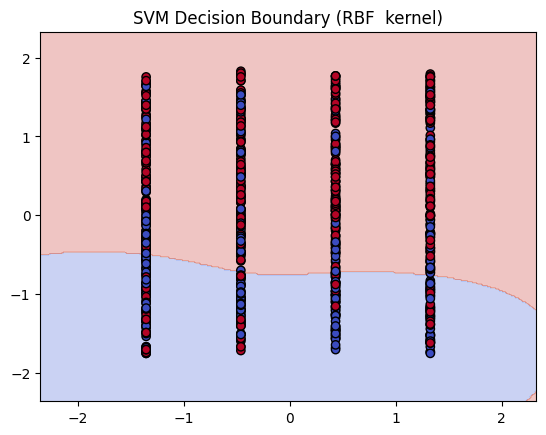

kernel :SIGMOID|| Accuracy:0.58


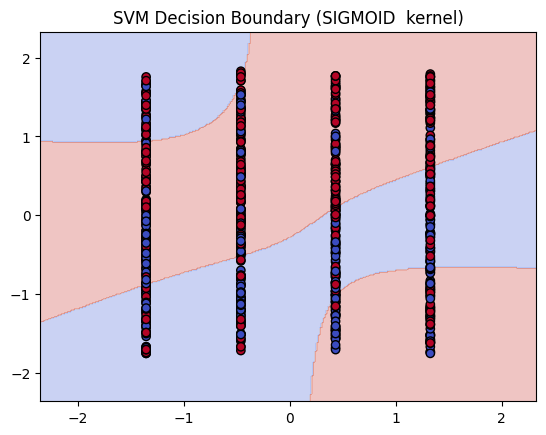

In [25]:
kernels = ['linear','poly','rbf','sigmoid']

for kernel in kernels:
    svm = SVC(kernel=kernel,degree =3,gamma='auto')
    svm.fit(X_train,y_train)

    acc = svm.score(X_test,y_test)
    print(f'kernel :{kernel.upper()}|| Accuracy:{acc:.2f}')
    


    plt.Figure(figsize=(6,5))
  
    plt.title(f'SVM Decision Boundary ({kernel.upper()}  kernel)')
    x_min,x_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    y_min,y_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,300),
                         np.linspace(y_min,y_max,300))
    
    Z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx,yy,Z,alpha=0.3,cmap=plt.cm.coolwarm)
    plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y,cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()